In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

from pprint import pprint

# Impor the DataGov API key
#from api_keys import dataapi_key



In [2]:
#Read saved data 
county_census_df = pd.read_csv("Resources/county_level_consolidated_with_census_info_2.csv")

#Display sample data
county_census_df.head()



,Unnamed: 0,county_name,data_year,Crimes Against Persons,Crimes Against Society,Crimes Against Property,POVERTY_RATE,POPULATION
0,0,ALAMEDA,2017,7284,12156,8169,12,1487888
1,1,ALAMEDA,2018,7242,11225,7670,12,1487888
2,2,ALAMEDA,2019,7188,10867,7321,12,1487888
3,3,ALAMEDA,2020,6301,6507,6477,12,1487888
4,4,ALAMEDA,2021,105,183,278,12,1487888


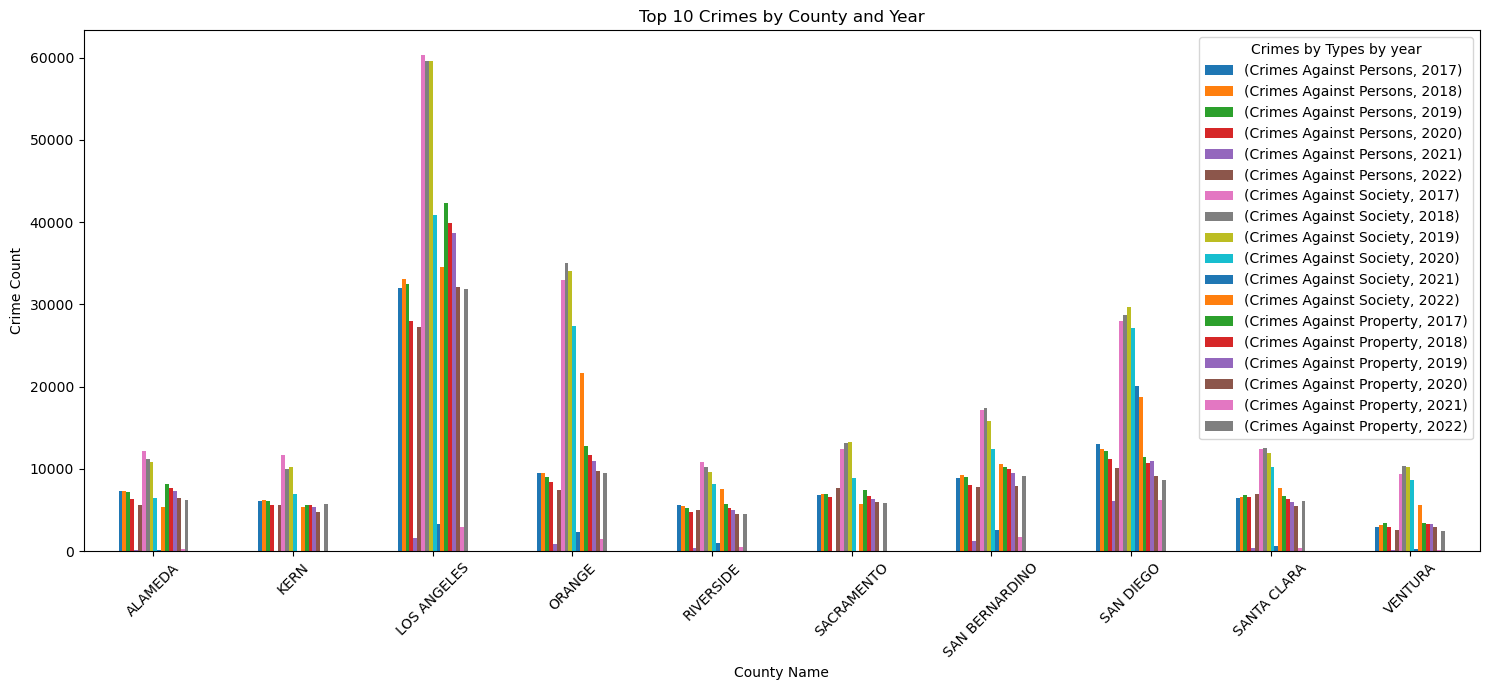

In [3]:
# Find the top 10 counties with the highest Crimes Against Society
top_10_Society = county_census_df.groupby("county_name")["Crimes Against Society"].sum().nlargest(10).index

# Filter the data for the top 10 counties
top_CASociety_data = county_census_df[county_census_df["county_name"].isin(top_10_Society)]

#Create the plot
ax = top_CASociety_data.pivot(index='county_name', columns='data_year', values=['Crimes Against Persons','Crimes Against Society', 'Crimes Against Property']).plot(kind='bar', stacked=False, figsize=(15, 7))

#Set the title and labels
plt.title("Top 10 Crimes by County and Year")
plt.xlabel("County Name")
plt.xticks(rotation=45)
plt.ylabel("Crime Count")

#Set the legend title to "Crimes over the year"
ax.legend(title='Crimes by Types by year')

plt.tight_layout()

#Save the figure
plt.savefig("output_data/Top10AllCrimes.png")

#Show the plot
plt.show()

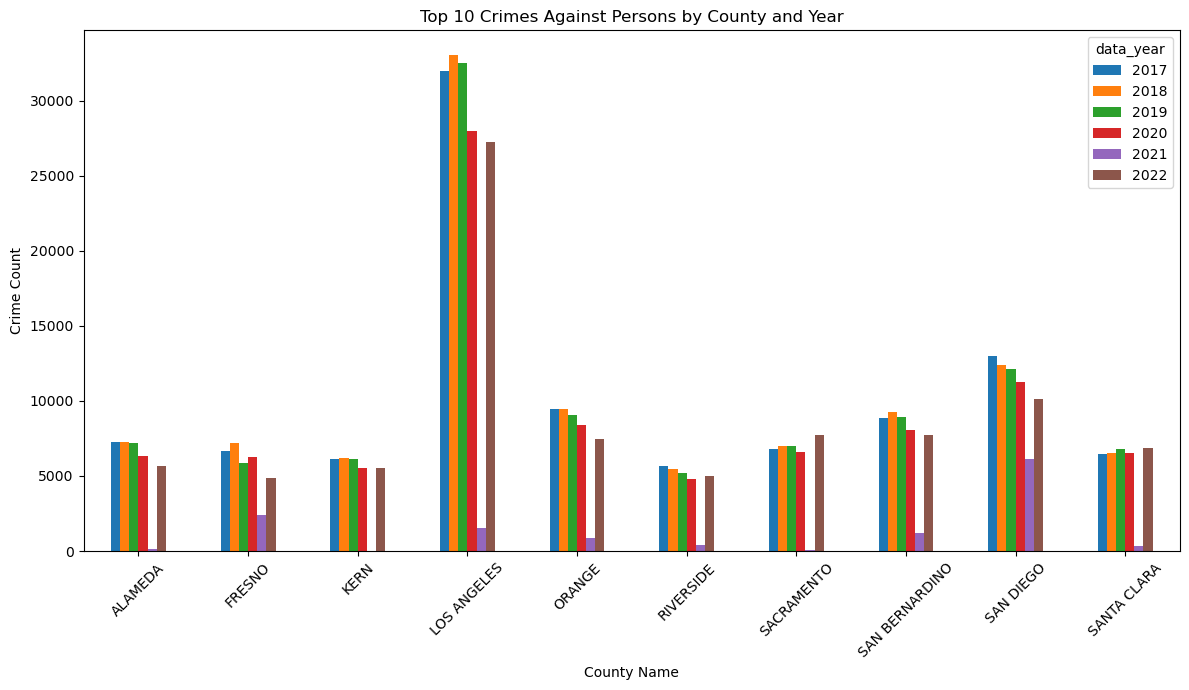

In [4]:
# Find the top 10 counties with the highest Crimes Against Society
top_10_CAPersons = county_census_df.groupby("county_name")["Crimes Against Persons"].sum().nlargest(10).index

# Filter the data for the top 10 counties
top_CAPersons_data = county_census_df[county_census_df["county_name"].isin(top_10_CAPersons)]


#create a multiplot bar chart with different colors for each year
top_CAPersons_data.pivot(index='county_name', columns='data_year', values='Crimes Against Persons').plot(kind='bar', stacked=False, figsize=(12, 7))

#set the title and labels
plt.title("Top 10 Crimes Against Persons by County and Year")
plt.xlabel("County Name")
plt.xticks(rotation=45)
plt.ylabel("Crime Count")
plt.tight_layout()

#save the figure
plt.savefig("output_data/Top10CAPersons.png")

#show plot
plt.show()


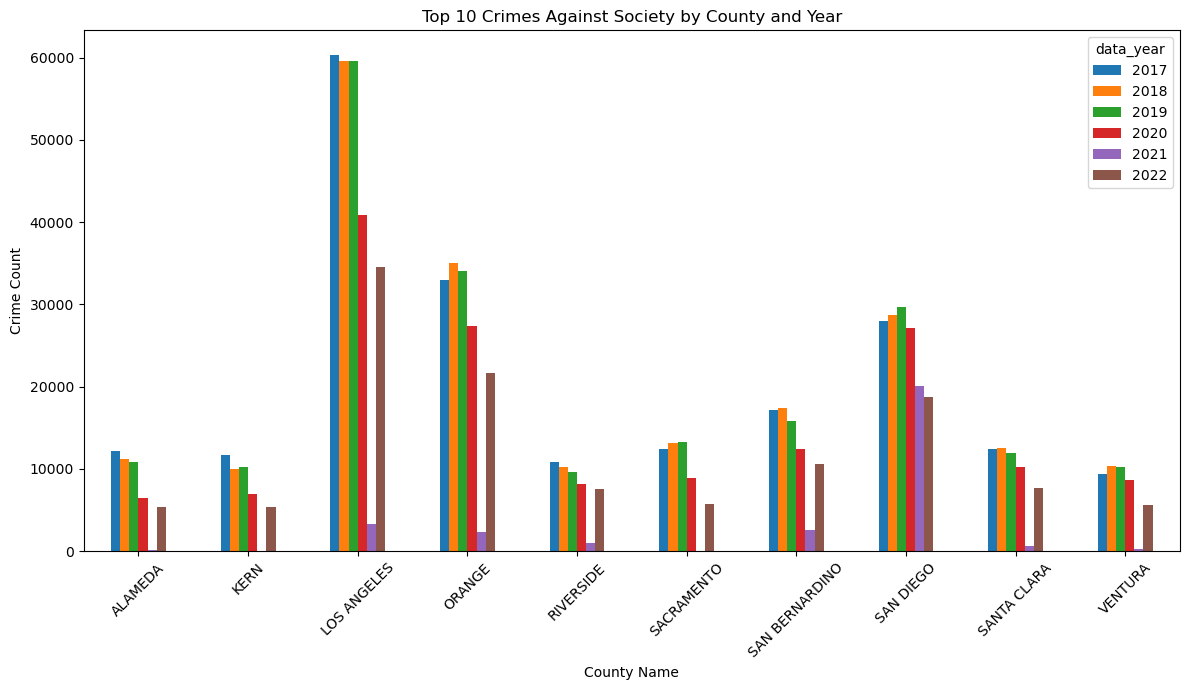

In [5]:
# Find the top 10 counties with the highest Crimes Against Society
top_10_Society = county_census_df.groupby("county_name")["Crimes Against Society"].sum().nlargest(10).index

# Filter the data for the top 10 counties
top_CASociety_data = county_census_df[county_census_df["county_name"].isin(top_10_Society)]


#create a multiplot bar chart with different colors for each year
top_CASociety_data.pivot(index='county_name', columns='data_year', values='Crimes Against Society').plot(kind='bar', stacked=False, figsize=(12, 7))

#set the title and labels
plt.title("Top 10 Crimes Against Society by County and Year")
plt.xlabel("County Name")
plt.xticks(rotation=45)
plt.ylabel("Crime Count")
plt.tight_layout()

#save the figure
plt.savefig("output_data/Top10CASociety.png")

#show plot
plt.show()


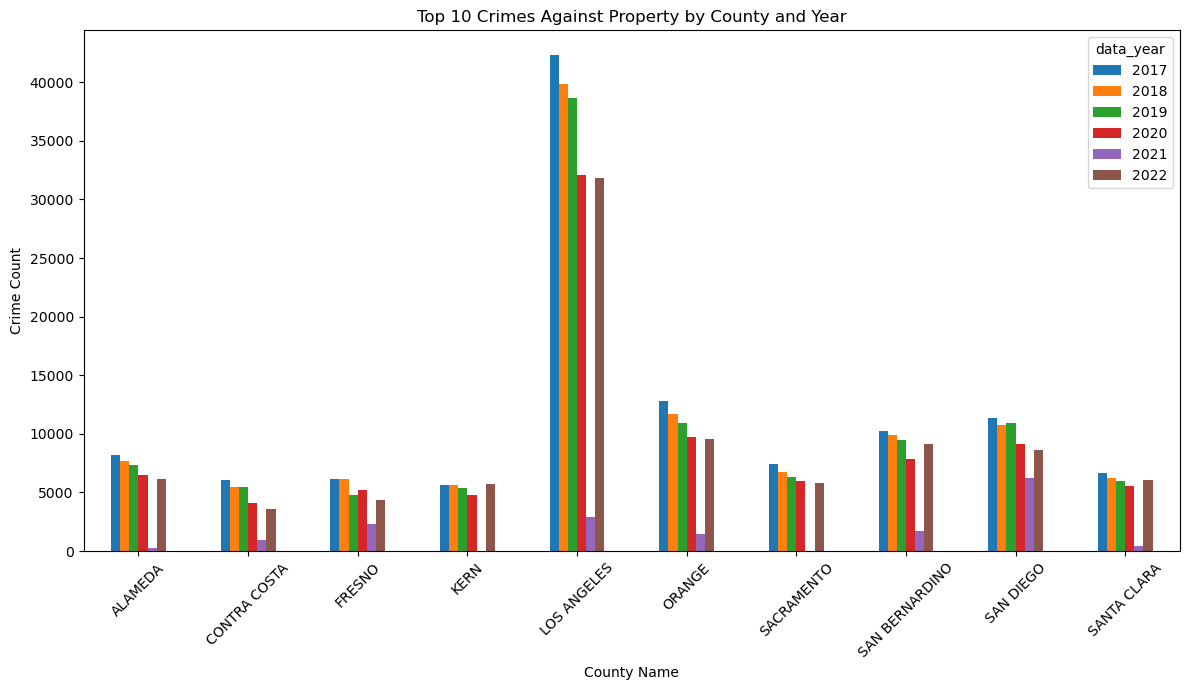

In [6]:
# Find the top 10 counties with the highest Crimes Against Society
top_10_Property = county_census_df.groupby("county_name")["Crimes Against Property"].sum().nlargest(10).index

# Filter the data for the top 10 counties
top_CASociety_data = county_census_df[county_census_df["county_name"].isin(top_10_Property)]


#create a multiplot bar chart with different colors for each year
top_CASociety_data.pivot(index='county_name', columns='data_year', values='Crimes Against Property').plot(kind='bar', stacked=False, figsize=(12, 7))

#set the title and labels
plt.title("Top 10 Crimes Against Property by County and Year")
plt.xlabel("County Name")
plt.xticks(rotation=45)
plt.ylabel("Crime Count")
plt.tight_layout()

#save the figure
plt.savefig("output_data/Top10CAProperty.png")

#show plot
plt.show()


In [25]:
#Grouped by county and average cimes by county and get mean for poverty reate and population
avg_crimetype_county_df = county_census_df.groupby("county_name").agg({
    "Crimes Against Persons": "mean",
    "Crimes Against Society": "mean",
    "Crimes Against Property": "mean",
    "POVERTY_RATE": "mean",
    "POPULATION": "mean"
}).reset_index()

#Add Total Crime Count column and add data from combining the other three crime columns
avg_crimetype_county_df['Total Crime Count'] = avg_crimetype_county_df["Crimes Against Persons"] + avg_crimetype_county_df["Crimes Against Society"] + avg_crimetype_county_df["Crimes Against Property"]

#Display the new DataFrame
avg_crimetype_county_df.head()

,county_name,Crimes Against Persons,Crimes Against Society,Crimes Against Property,POVERTY_RATE,POPULATION,Total Crime Count
0,ALAMEDA,5626.000000,7724.333333,6010.333333,12.0,1487888.0,19360.666667
1,ALPINE,12.400000,8.000000,4.800000,14.0,1160.0,25.200000
2,AMADOR,124.200000,291.400000,82.600000,11.0,33228.0,498.200000
3,BUTTE,1204.166667,3004.833333,1076.166667,21.0,214624.0,5285.166667
4,CALAVERAS,246.666667,194.833333,100.833333,10.0,44740.0,542.333333


The correlation between poverty rate and crime count is 0.02


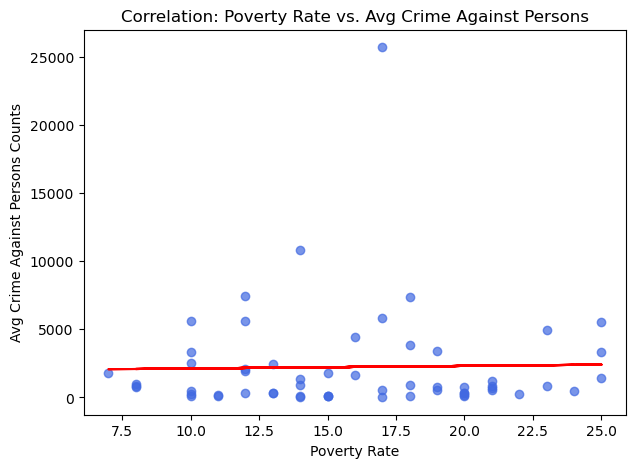

In [26]:
correlation = st.pearsonr(avg_crimetype_county_df['POVERTY_RATE'], avg_crimetype_county_df['Crimes Against Persons'])
print(f'The correlation between poverty rate and crime count is {round(correlation[0],2)}')

x_values = avg_crimetype_county_df['POVERTY_RATE']
y_values = avg_crimetype_county_df['Crimes Against Persons']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values, color='royalblue', alpha=0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Avg Crime Against Persons Counts')
plt.title('Correlation: Poverty Rate vs. Avg Crime Against Persons')

#save the figure
plt.savefig("output_data/cor_poverty_vs_CAPersons.png")

#show plot
plt.show()

The correlation between poverty rate and crime count is -0.04


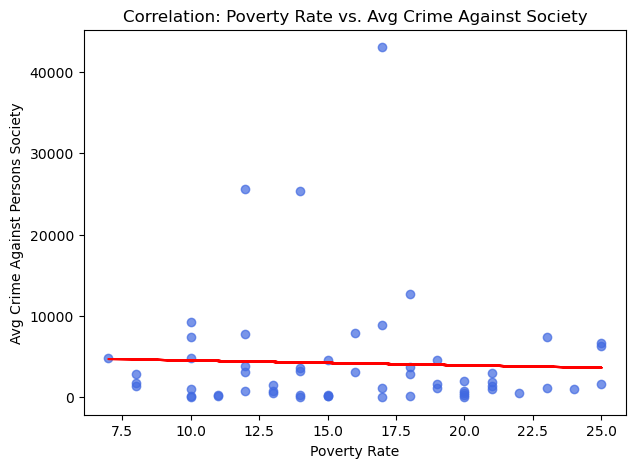

In [27]:
correlation = st.pearsonr(avg_crimetype_county_df['POVERTY_RATE'], avg_crimetype_county_df['Crimes Against Society'])
print(f'The correlation between poverty rate and crime count is {round(correlation[0],2)}')

x_values = avg_crimetype_county_df['POVERTY_RATE']
y_values = avg_crimetype_county_df['Crimes Against Society']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values, color='royalblue', alpha=0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Avg Crime Against Persons Society')
plt.title('Correlation: Poverty Rate vs. Avg Crime Against Society')

#save the figure
plt.savefig("output_data/cor_poverty_vs_CASociety.png")

#show plot
plt.show()

The correlation between poverty rate and crime count is 0.0


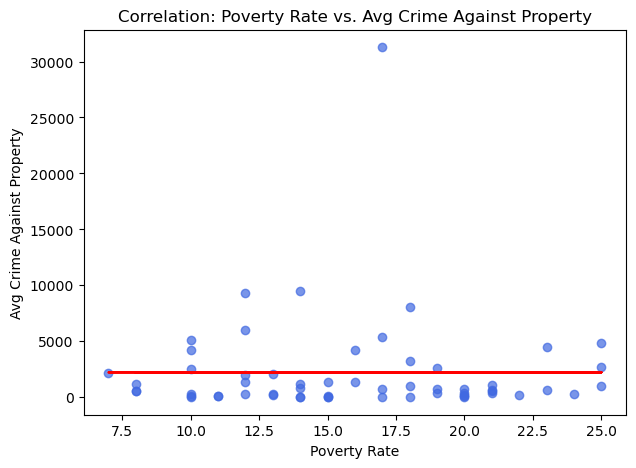

In [28]:
correlation = st.pearsonr(avg_crimetype_county_df['POVERTY_RATE'], avg_crimetype_county_df['Crimes Against Property'])
print(f'The correlation between poverty rate and crime count is {round(correlation[0],2)}')

x_values = avg_crimetype_county_df['POVERTY_RATE']
y_values = avg_crimetype_county_df['Crimes Against Property']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values, color='royalblue', alpha=0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Avg Crime Against Property')
plt.title('Correlation: Poverty Rate vs. Avg Crime Against Property')

#save the figure
plt.savefig("output_data/cor_poverty_vs_CAProperty.png")

#show plot
plt.show()

The correlation between poverty rate and crime count is -0.01


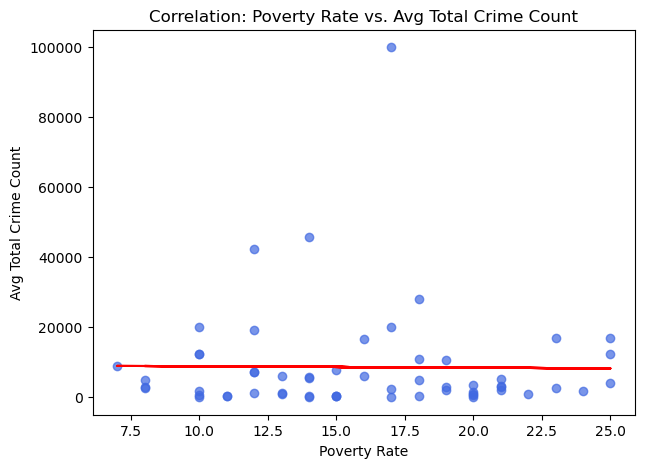

In [29]:
correlation = st.pearsonr(avg_crimetype_county_df['POVERTY_RATE'], avg_crimetype_county_df['Total Crime Count'])
print(f'The correlation between poverty rate and crime count is {round(correlation[0],2)}')

x_values = avg_crimetype_county_df['POVERTY_RATE']
y_values = avg_crimetype_county_df['Total Crime Count']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values, color='royalblue', alpha=0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('Avg Total Crime Count')
plt.title('Correlation: Poverty Rate vs. Avg Total Crime Count')

#save the figure
plt.savefig("output_data/cor_poverty_vs_TotalCrime.png")

#show plot
plt.show()

The correlation between poverty rate and crime count is 0.98


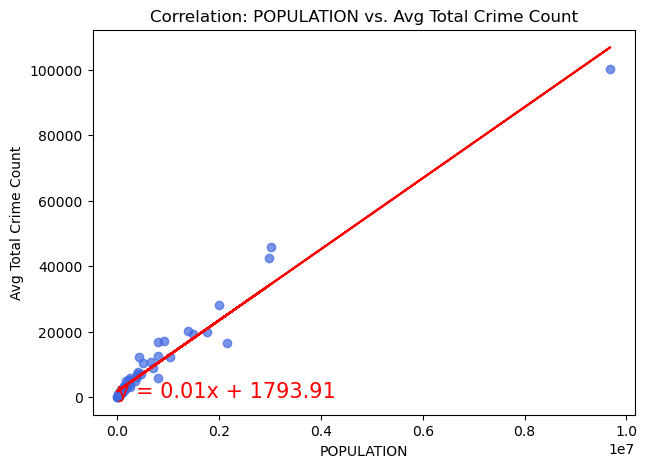

In [30]:
correlation = st.pearsonr(avg_crimetype_county_df['POPULATION'], avg_crimetype_county_df['Total Crime Count'])
print(f'The correlation between poverty rate and crime count is {round(correlation[0],2)}')

x_values = avg_crimetype_county_df['POPULATION']
y_values = avg_crimetype_county_df['Total Crime Count']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values, color='royalblue', alpha=0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('POPULATION')
plt.ylabel('Avg Total Crime Count')
plt.title('Correlation: POPULATION vs. Avg Total Crime Count')

#save the figure
plt.savefig("output_data/cor_pop_vs_TotalCrime.png")

#show plot
plt.show()


In [20]:
#Read saved data 
county_crime_type_df = pd.read_csv("Resources/county_level_consolidated_all_agencies_all_available_years.csv")

#Display sample data
county_crime_type_df.head()

,county_name,data_year,Crimes Against Persons,Crimes Against Society,Crimes Against Property
0,ALAMEDA,2017,7284,12156,8169
1,ALAMEDA,2018,7242,11225,7670
2,ALAMEDA,2019,7188,10867,7321
3,ALAMEDA,2020,6301,6507,6477
4,ALAMEDA,2021,105,183,278


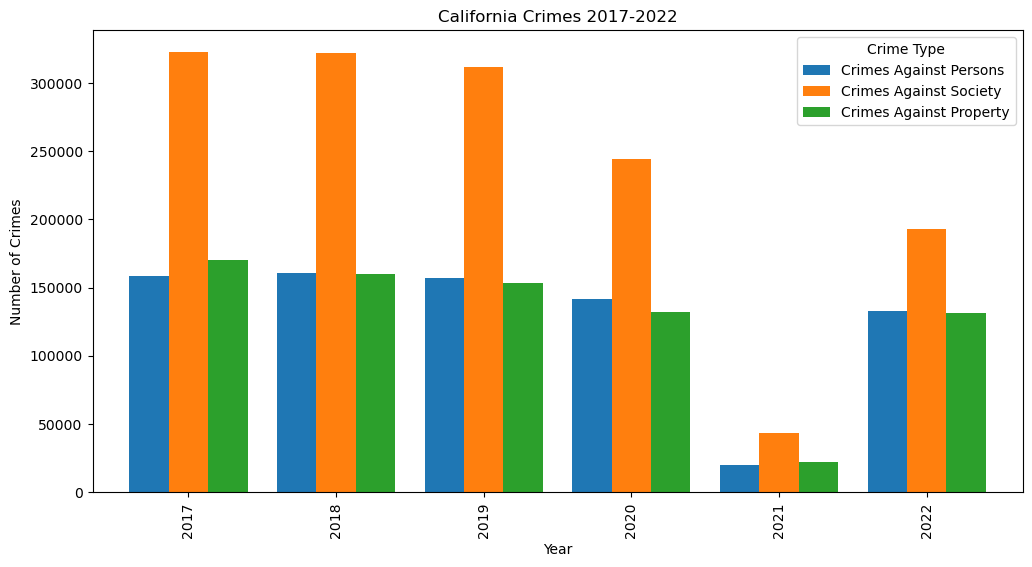

In [21]:
#To plot pie chart for each year in california, grouped by data_year
grouped_county_crime_df = county_crime_type_df.groupby('data_year')[['Crimes Against Persons', 'Crimes Against Society', 'Crimes Against Property']].sum()

#create bar chart to compare overall crime for 2017-2022
grouped_county_crime_df.plot(kind='bar', figsize=(12,6), width=0.8)
plt.title('California Crimes 2017-2022')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', loc='upper right')

#save the figure
plt.savefig("output_data/CA_Crime_byYear.png")

#show plot
plt.show()


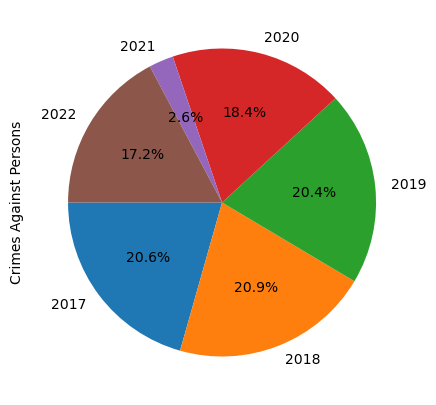

In [22]:
# Filter the DataFrame for 'Crimes Against Persons' column
crimes_against_persons = grouped_county_crime_df['Crimes Against Persons']
          
# Plot a pie chart
crimes_against_persons.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=180)


#save the figure
plt.savefig("output_data/PieCA_Persons_byYear.png")



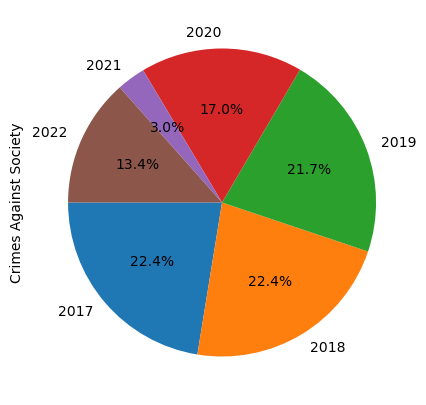

In [23]:
# Filter the DataFrame for 'Crimes Against Persons' column
crimes_against_society = grouped_county_crime_df['Crimes Against Society']

          
# Plot a pie chart
crimes_against_society.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=180)

#save the figure
plt.savefig("output_data/PieCA_Society_byYear.png")

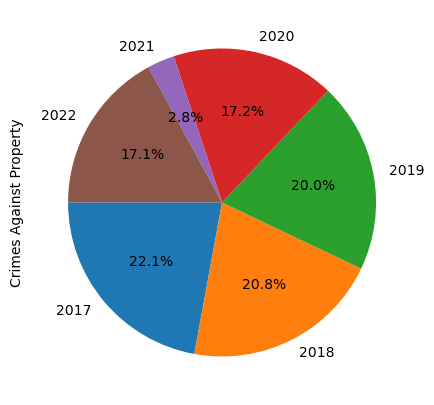

In [24]:
# Filter the DataFrame for 'Crimes Against Persons' column
crimes_against_property = grouped_county_crime_df['Crimes Against Property']

          
# Plot a pie chart
crimes_against_property.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=180)

#save the figure
plt.savefig("output_data/PieCA_Property_byYear.png")